1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

51
100
105
256


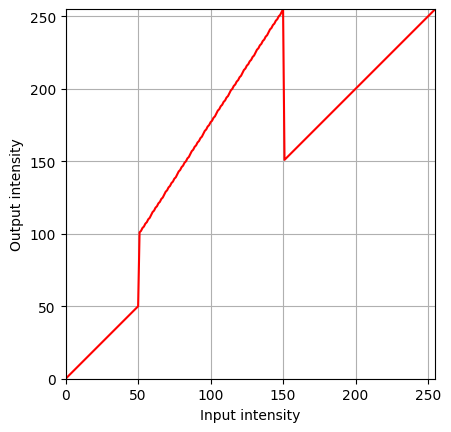

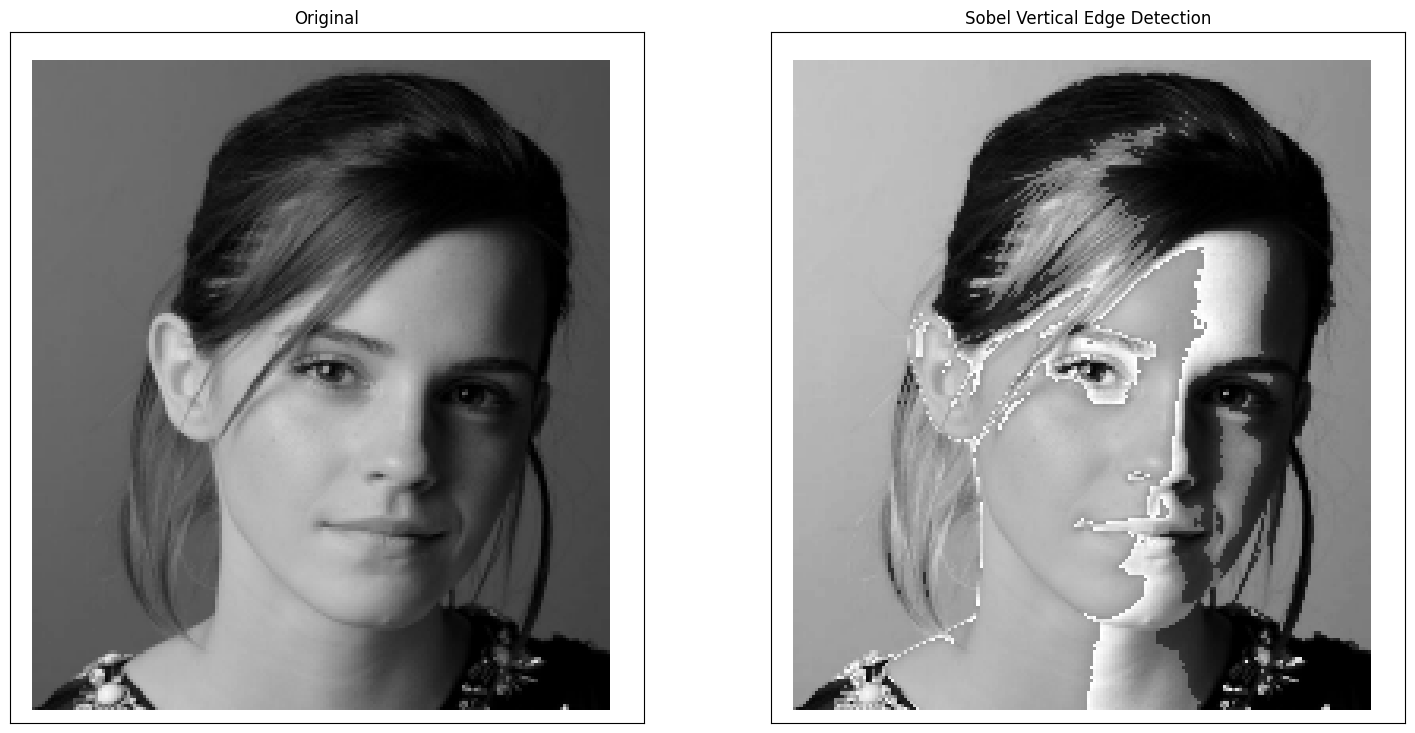

In [19]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100),(150, 255),(150, 150),(255,255)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3, 1] + 1, c[4,1], c[4,0] - c[3, 0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

img_orig = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/ema.jpg", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
#img = cv.imshow("Image", img_orig)
#cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
#img2 =cv.imshow("Image", image_transformed)
#cv.waitKey(0)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Sobel Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])

cv.destroyAllWindows()


2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

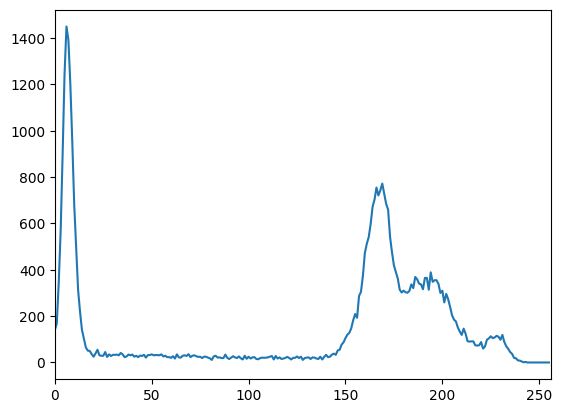

16
125
100
100
256


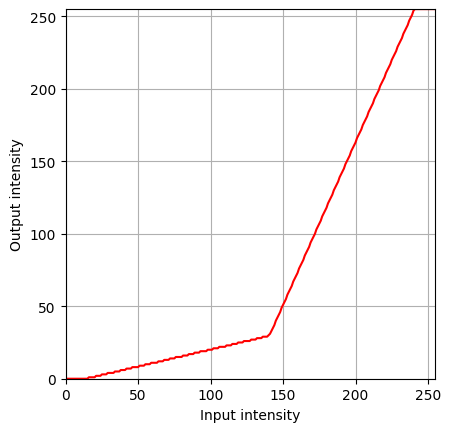

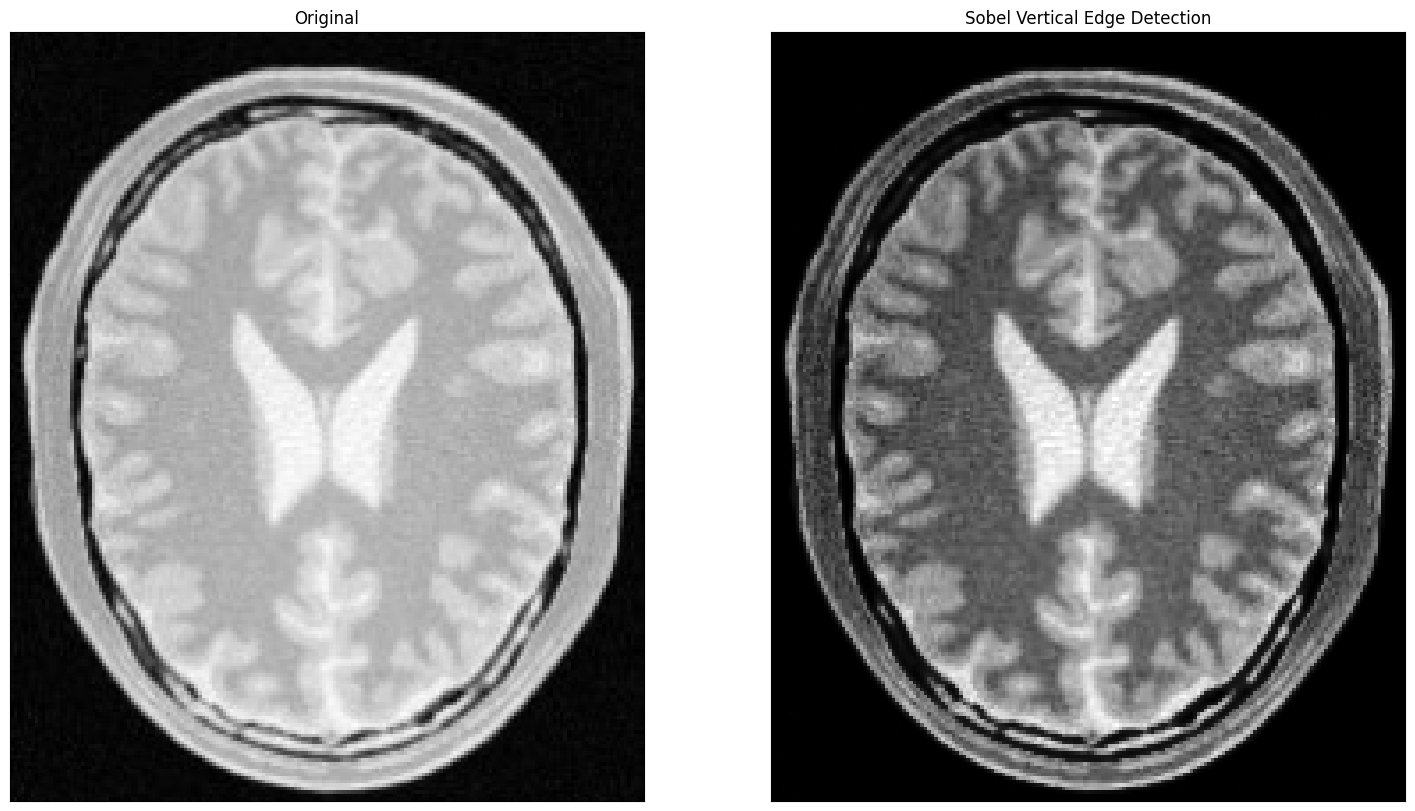

In [48]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/brain.jpg",cv.IMREAD_GRAYSCALE)
assert im1 is not None

#method 1
hist = cv.calcHist([im1],[0],None, [256],[0, 256])
plt.plot(hist)
plt.xlim([0 ,256])
plt.show()

#method 2
c = np.cumsum(hist)
t = np.array([255*c[i]/c[-1] for i in range(256)],dtype = np.uint8)

c = np.array([(15, 0), (140, 30),(240, 254)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1, 1] + 1, c[2,1], c[2,0] - c[1, 0]).astype('uint8')
print(len(t3))
t4 = np.linspace(c[2, 1] + 1, 255, 255 - c[2, 0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

img_orig = cv.imread('F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/brain.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
#img = cv.imshow("Image", img_orig)
#cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
#img2 =cv.imshow("Image", image_transformed)
#cv.waitKey(0)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Sobel Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])

cv.destroyAllWindows()

3. Consider the image shown in Fig. 3
1
. [10]
(a) Apply gamma correction to the L plane in the L
∗a
∗b
∗
color space and state the γ value.
(b) Show the histograms of the original and corrected images.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gamma : 0.8750596201925341


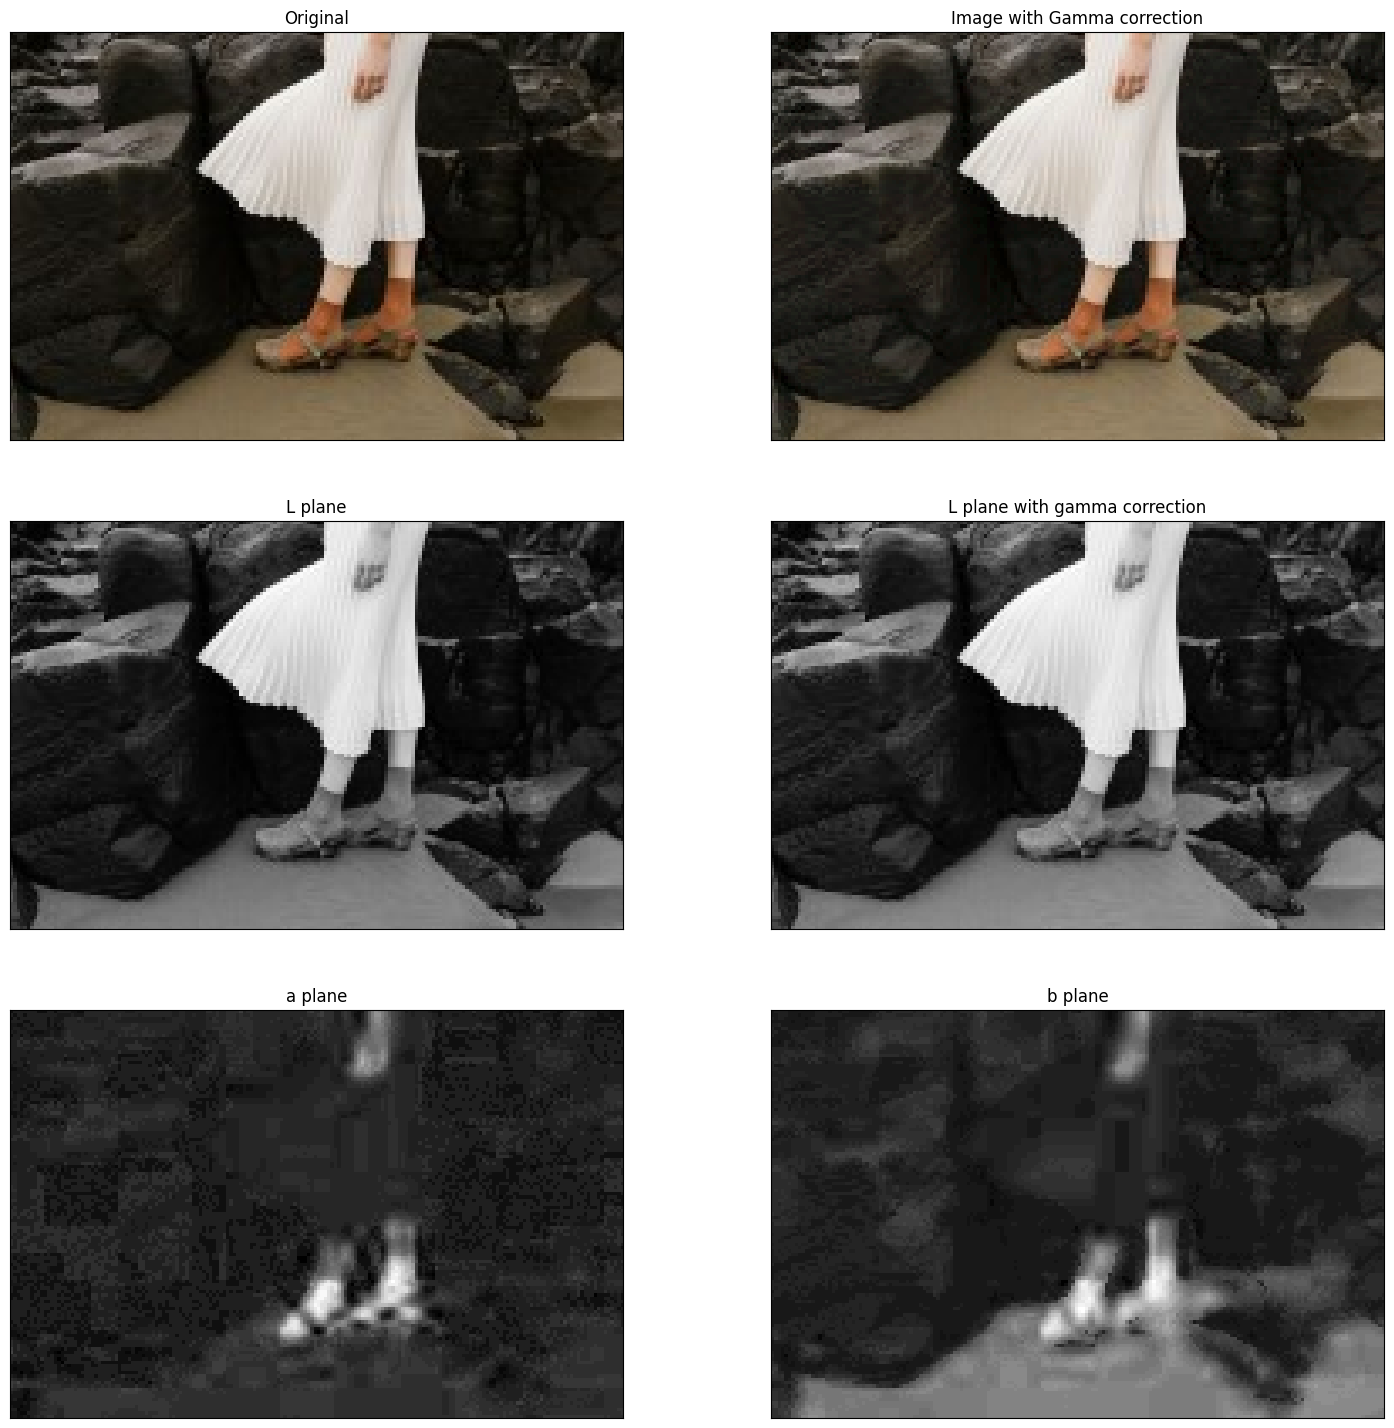

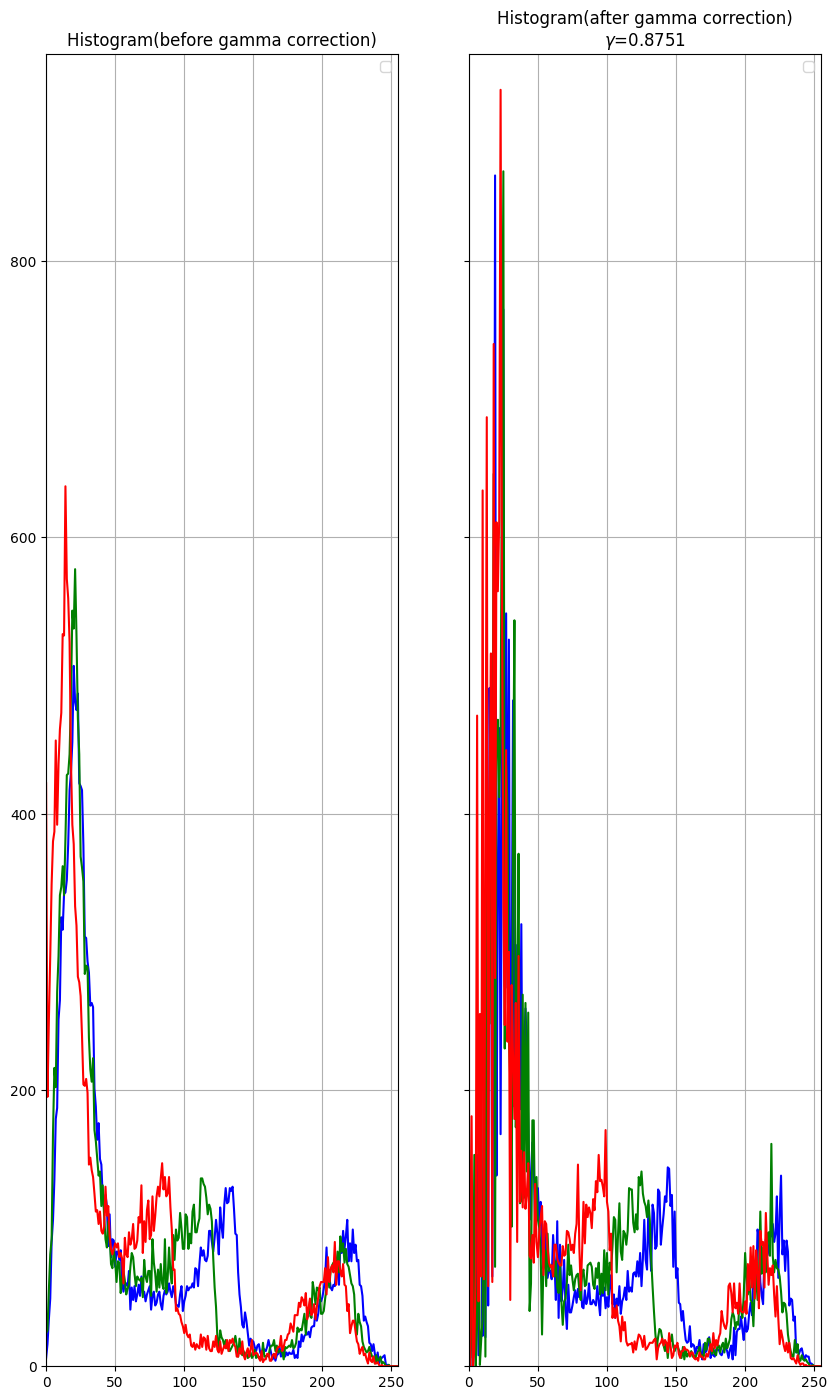

In [267]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img_orig = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/q3.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
img_L_orig, img_a, img_b = cv.split(img_orig)

mean = np.mean(img_L_orig)
gamma = math.log(mean)/math.log(128)
print('Gamma :',gamma)

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_L_gamma = cv.LUT(img_L_orig, table)

img_gamma = cv.merge([img_L_gamma, img_a, img_b])
img_cvt_gamma = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB) 

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes[0,0].imshow(img_orig1, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(img_cvt_gamma, cmap='gray')
axes[0,1].set_title('Image with Gamma correction')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(img_L_orig, cmap='gray')
axes[1,0].set_title('L plane')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(img_L_gamma, cmap='gray')
axes[1,1].set_title('L plane with gamma correction')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

axes[2,0].imshow(img_a, cmap='gray')
axes[2,0].set_title('a plane')
axes[2,0].set_xticks([]), axes[2,0].set_yticks([])

axes[2,1].imshow(img_b, cmap='gray')
axes[2,1].set_title('b plane')
axes[2,1].set_xticks([]), axes[2,1].set_yticks([])

fig1, ax1 =  plt.subplots(1,2,figsize=(10, 20), sharey=all, sharex = all)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig1], [i], None, [256], [0, 256])
    ax1[0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_cvt_gamma], [i], None, [256], [0, 256])
    ax1[1].plot(hist_gamma, color=c)

# Plot the gamma correction lookup table
ax1[0].set_xlim(0, 255)
ax1[0].set_aspect('equal')
ax1[1].set_xlim(0, 255)
ax1[1].set_ylim(0,950)
ax1[0].set_ylim(0,950)
ax1[1].set_aspect('equal')
ax1[1].grid(True)
ax1[0].grid(True)

ax1[0].legend(loc = 'best')
ax1[1].legend(loc = 'best')
ax1[0].set_title('Histogram(before gamma correction)')
ax1[1].set_title('Histogram(after gamma correction)\n'+r'$\gamma$='+str(round(gamma,4)))


plt.savefig('hist.png')
# Display the plots
plt.show()
cv.destroyAllWindows()


4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation to the saturation plane,
(a) Split the image shown in Fig. 4 into hue, saturation, and value planes.
(b) Apply the aforementioned intensity transformation to the saturation plane.
(c) Adjust a to get a visually pleasing output. Report the value of a.
(d) Recombine the three planes.
(e) Display the original image, vibrance-enhanced image, and the intensity transformation.

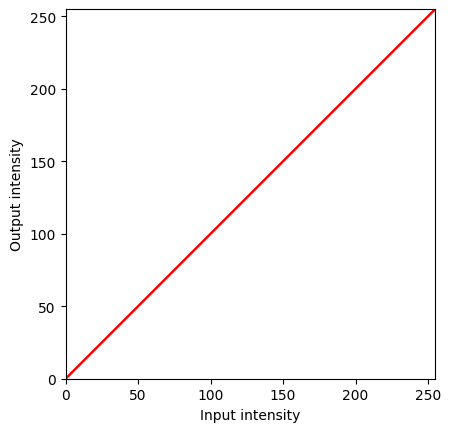

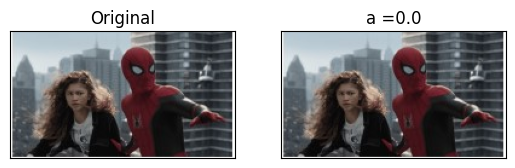

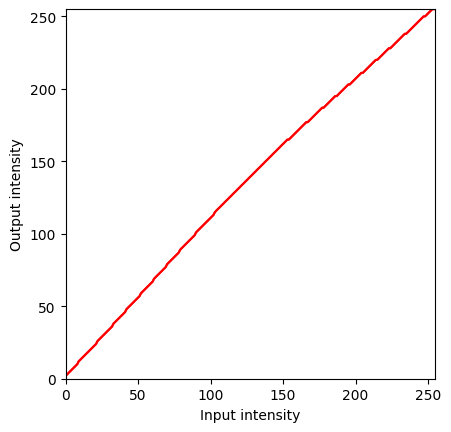

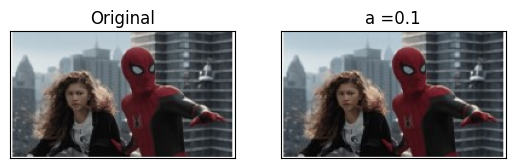

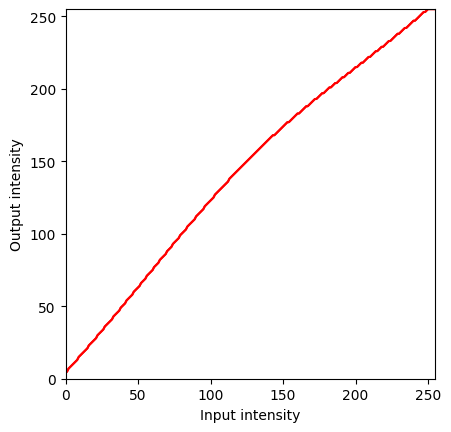

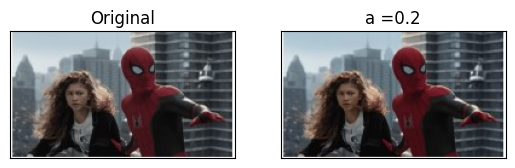

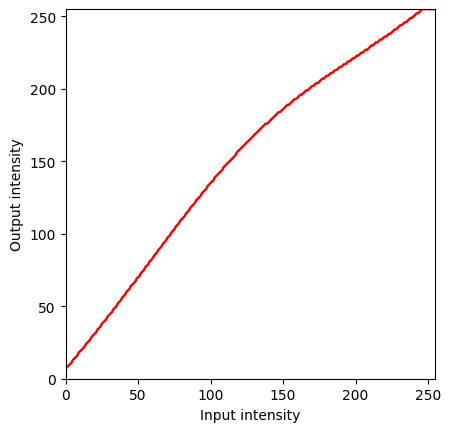

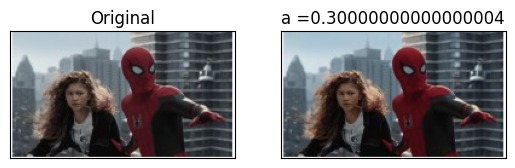

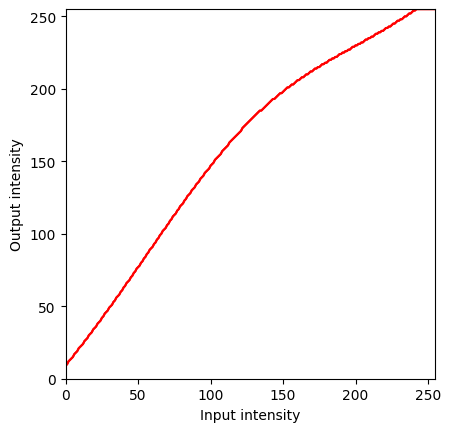

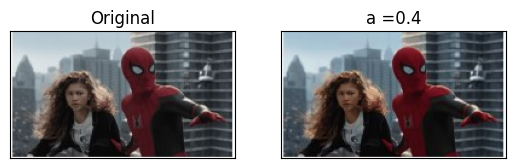

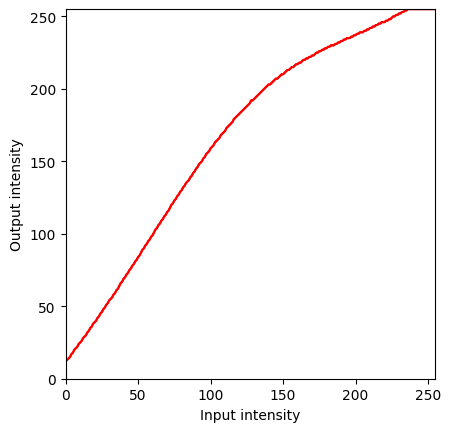

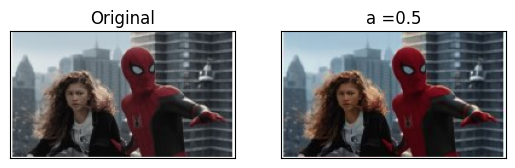

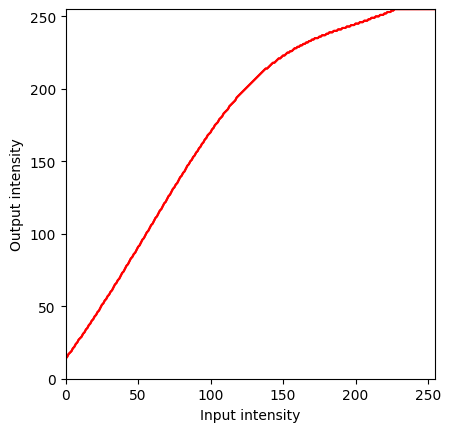

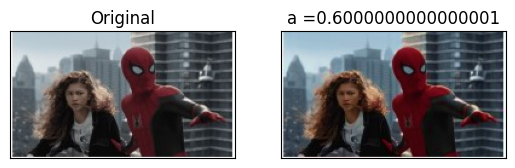

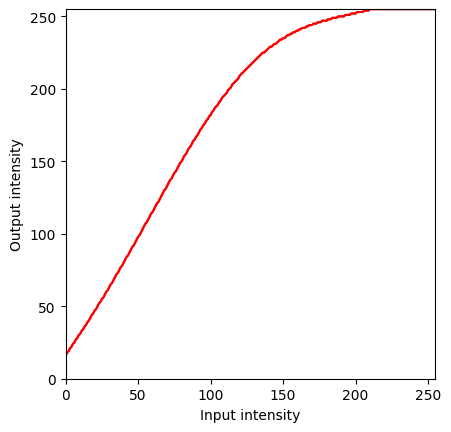

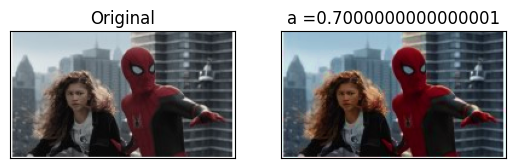

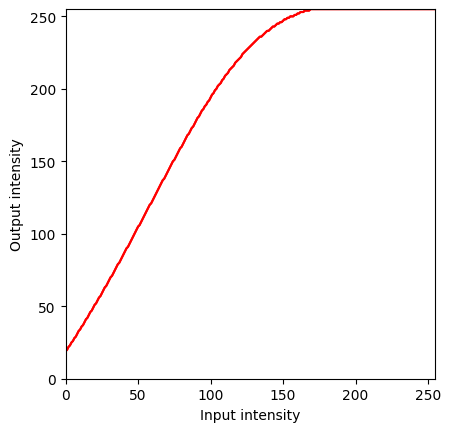

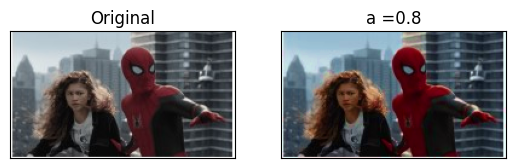

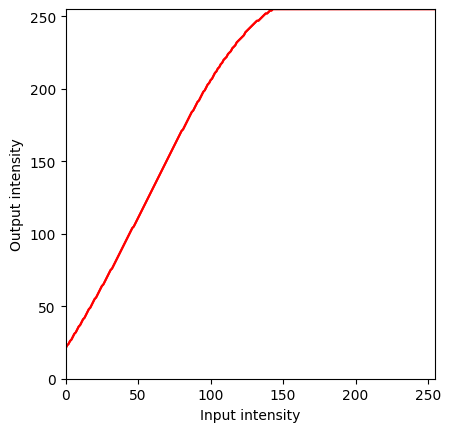

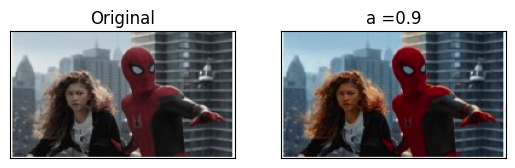

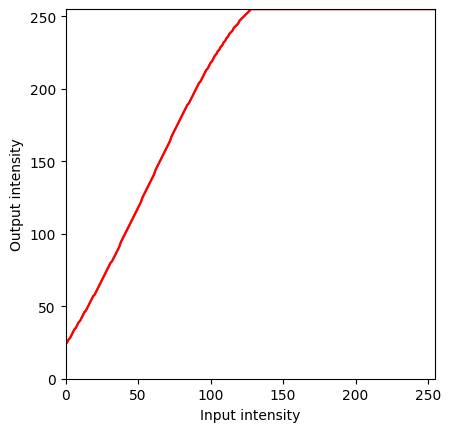

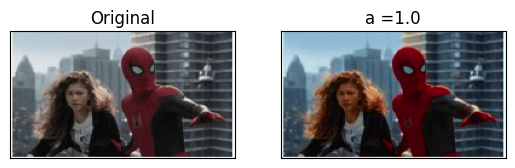

In [215]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


img_orig = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/q4.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_H, img_S, img_V = cv.split(img_orig)

sigma = 70
sequence = [i*.1 for i in range(0,11)]

for i, a in enumerate(sequence):

    transform = np.array([min((j+(128*a*math.exp(-((j-128)**2)/(2*(sigma**2))))),255) for j in np.arange(0,256)]).astype(np.uint8)
    img_S_trans = cv.LUT(img_S, transform)
    img_trans = cv.merge([img_H, img_S_trans, img_V])
    img_trans1 = cv.cvtColor(img_trans, cv.COLOR_HSV2RGB) 

    fig1, ax1 = plt.subplots()
    ax1.plot(transform, color='red')
    ax1.set_xlabel(r'Input intensity')
    ax1.set_ylabel('Output intensity')
    ax1.set_xlim(0, 255)
    ax1.set_ylim(0, 255)
    ax1.set_aspect('equal')
    ax1.plot(transform, color='red')
    ax1.set_aspect('equal')

    fig, ax = plt.subplots(1, 2)
    ax[1].imshow(img_trans1, cmap='gray')
    ax[1].set_title('a ='+str(a))
    ax[1].set_xticks([]), ax[1].set_yticks([])

    ax[0].imshow(img_orig1, cmap='gray')
    ax[0].set_title('Original')
    ax[0].set_xticks([]), ax[0].set_yticks([])


    plt.savefig('transform.png')
    plt.grid(True)
    plt.show()
        



a =

5. Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization.

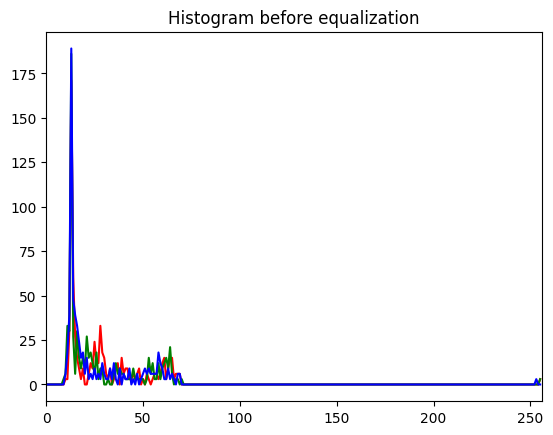

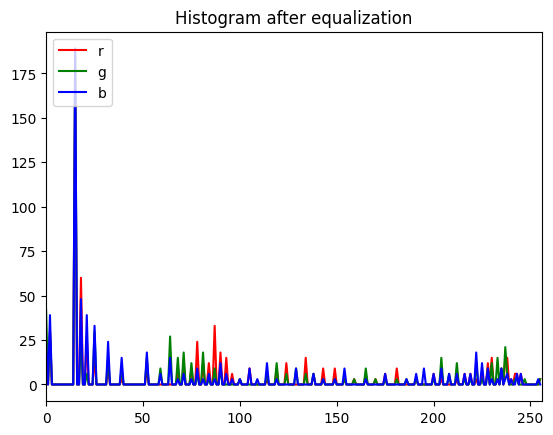

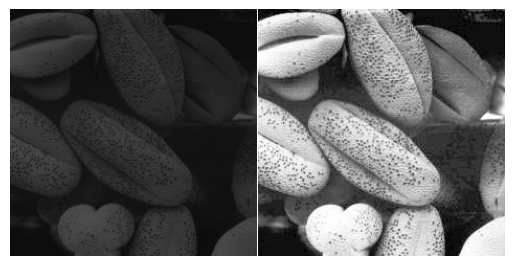

In [328]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def img_eq(img):

    if(len(img.shape) ==3 and img.shape[2] == 3 ):
         img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
         r,g,b = cv.split(img_cvt)
         r_eq = cv.equalizeHist(r)
         g_eq = cv.equalizeHist(g)
         b_eq = cv.equalizeHist(b)
         return cv.merge([r_eq, g_eq, b_eq])
    
    return cv.equalizeHist(img_orig)



def hist(img):


    if(len(img.shape) ==2 or img.shape[2] != 3 ):
        hist, bins = np.histogram(img.ravel(), 256, [0,256])
        plt.hist(img.flatten(), 256, [0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend('Histogram', loc = 'upper left')
        plt.title('Histogram before equalization')
        plt.show()
        equ = img_eq(img)

       # plt.subplot(1,2,2)
        hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
        plt.hist(equ.flatten(), 256,[0,256], color='r')
        plt.xlim([0,256])
        plt.legend('Histogram', loc = 'upper left')
        plt.title('Histogram after equalization')
        plt.show()


    else:

        color = ('r', 'g', 'b')
        for index, cl in enumerate(color):
            hist = cv.calcHist(img,[index],None,[256],[0,256])
            plt.plot(hist, color=cl)
            #plt.hist(img.flatten(), 256, [0,256], color = cl)
        plt.title('Histogram before equalization')
        plt.xlim([0, 256])
        plt.show()
        plt.legend(color, loc = 'upper left')

        equ = img_eq(img)

        for index, cl in enumerate(color):
            hist = cv.calcHist(equ,[index],None,[256],[0,256])
            plt.plot(hist, color=cl)
            #plt.hist(equ.flatten(), 256, [0,256], color = cl)
        plt.title('Histogram after equalization')
        plt.xlim([0, 256])
        plt.legend(color, loc = 'upper left')
        plt.show()

    res = np.hstack((img_orig, equ))
    plt.axis('off')
    plt.imshow(res, cmap='gray')
    plt.show()

         
img_orig = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/q5.jpg")#, cv.IMREAD_GRAYSCALE)
assert img_orig is not None
eq_img = hist(img_orig)


6. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground.
(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.
(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.
(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
(d) Obtain the cumulative sum of the histogram using np.cumsum.
(e) Use the formulas in slides to histogram-equalize the foreground.
(f) Extract the background and add with the histogram equalized foreground.

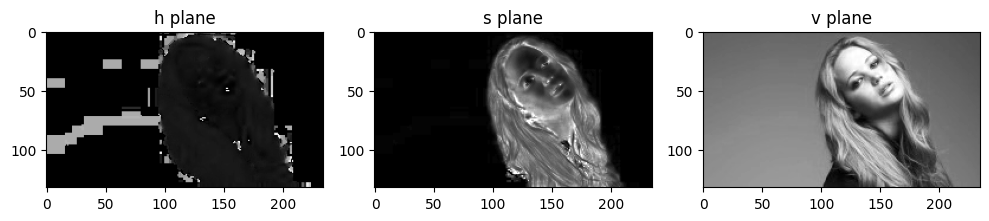

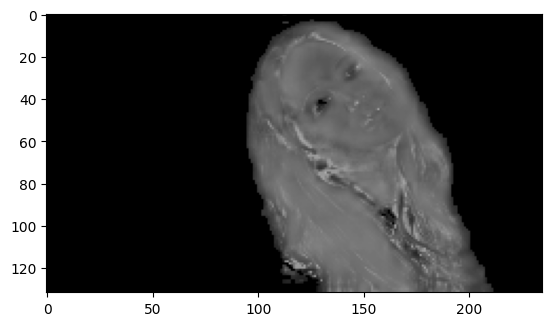

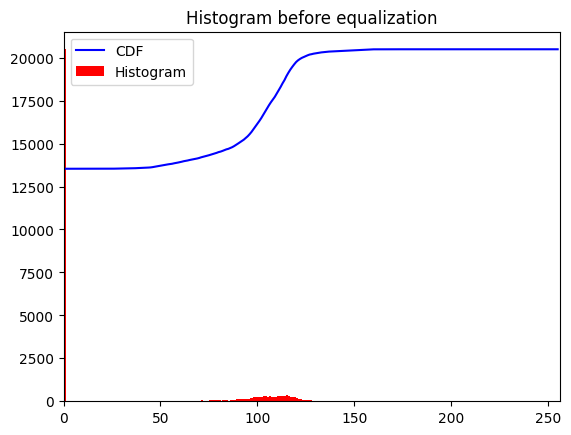

In [365]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/q6.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_H, img_S, img_V = cv.split(img_orig)

#display these planes in grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(img_H, cmap='gray')
plt.title('h plane')

plt.subplot(1,3,2)
plt.imshow(img_S, cmap='gray')
plt.title('s plane')

plt.subplot(1,3,3)
plt.imshow(img_V, cmap='gray')
plt.title('v plane')

plt.tight_layout()
plt.show()

# threshold in extract the foreground mask
_, mask = cv.threshold(img_S, 17, 255, cv.THRESH_BINARY)
img_foreground = cv.bitwise_and(img_orig, img_orig, mask=mask)

#draw the histrogram of foreground
img_foreground_gray = cv.cvtColor(img_foreground, cv.COLOR_BGR2GRAY)

plt.imshow(cv.cvtColor(img_foreground_gray, cv.COLOR_BGR2RGB))
plt.show()

hist, bins = np.histogram(img_foreground_gray.ravel(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')        
plt.hist(img_foreground_gray.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc = 'upper left')
plt.title('Histogram before equalization')
plt.show()






